In [42]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats 

In [6]:
occupations = pd.read_excel(r"...\SPEOC-pt-1\Data\Post1790\CT\CT_post1790_CD_ledger.xlsx",
                             header=13, usecols='L, N, O, AD, AE, AT, AU') #occupations plus continental debt for conneticut

In [66]:
def get_debt_no_job():
    no_occ = occupations[occupations['Occupation'].isna()] #query all people listed who have debt but no occupation listed
    no_occ_copy = no_occ.copy() #avoid settingcopywarning warning
    no_occ_copy[['Cents', 'Cents.1', 'Cents.2']] = no_occ_copy[['Cents', 'Cents.1', 'Cents.2']].div(100) #divide cents column by 100
    total = no_occ_copy[['Dollar', 'Dollar.1', 'Dollar.2', 'Cents', 'Cents.1', 'Cents.2']].sum(axis=1) #find total with dollar and cents separate columns    

    return total.to_frame(name='totals') #convert to more usable dataframe format
    
get_debt_no_job()

,totals
5,767.01
15,3857.46
17,53.28
18,4664.42
19,139.61
...,...
1000,168.00
1001,68.66
1002,46.30
1003,0.02


In [74]:
def get_debt_w_job():
    occ = occupations[occupations['Occupation'].notna()] #query all people listed who have debt with an occupation listed
    occ_copy = occ.copy() #avoid settingcopywarning warning
    occ_copy[['Cents', 'Cents.1', 'Cents.2']] = occ_copy[['Cents', 'Cents.1', 'Cents.2']].div(100) #divide cents column by 100
    total = occ_copy[['Dollar', 'Dollar.1', 'Dollar.2', 'Cents', 'Cents.1', 'Cents.2']].sum(axis=1) #find total with dollar and cents separate columns       
    
    return total.to_frame(name='totals.2') #convert to more usable dataframe format 
    
get_debt_w_job() 

,totals.2
0,2105.63
1,907.03
2,423.30
3,467.36
4,147.43
...,...
939,584.08
944,457.10
946,114.01
1005,518.86


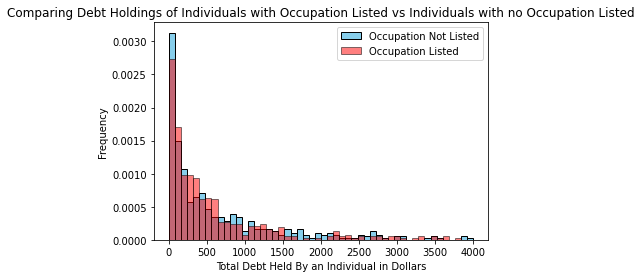

In [122]:
no_occ = get_debt_no_job()['totals'] #get dataframe for people with no occupation listed
occ = get_debt_w_job()['totals.2'] #get dataframe for people with an occupation listed
plt.hist(no_occ, color='skyblue', edgecolor='black', range=[0,4000], bins=50, label='Occupation Not Listed', density=True) #plot
plt.hist(occ, color='red', edgecolor='black', range=[0,4000], bins=50, alpha=0.5, label='Occupation Listed', density=True) #plot
plt.title("Comparing Debt Holdings of Individuals with Occupation Listed vs Individuals with no Occupation Listed") #add title
plt.xlabel("Total Debt Held By an Individual in Dollars") #add x title
plt.ylabel("Frequency") #add y title
plt.legend() #add legend

In [112]:
def calculate_ks():
    rng = np.random.default_rng() 
    n1 = len(get_debt_no_job())
    n2 = len(get_debt_w_job())
    
    rvs1 = stats.norm.rvs(size=n1, loc=0., scale=1, random_state=rng)
    rvs2 = stats.norm.rvs(size=n2, loc=0.5, scale=1.5, random_state=rng)
    return stats.ks_2samp(rvs1, rvs2)
    
calculate_ks()

KstestResult(statistic=0.23115135732323233, pvalue=2.699507284376068e-12)